1. R- Recency : How recently a customer has made a purchase
2. F- Frequency : How often a makes a purchase
3. M- Monetory :  how much overall money spend by a customer

In [54]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
 

In [2]:
data=pd.read_csv('E-com_Data.csv')
data.head()

C:\Users\Hp\AppData\Local\Temp\ipykernel_6092\2121684226.py:1: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('E-com_Data.csv')


,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [3]:
data.shape

(541116, 12)

In [4]:
data=data[ ['CustomerID','InvoieNo', 'Date of purchase', 'Price']   ]
data.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [5]:
data.rename(columns={"InvoieNo":"InvoiceNo", "Date of purchase":"Date"},inplace=True)


In [6]:
data.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [7]:
data.isnull().sum()

CustomerID    136927
InvoiceNo       3137
Date            3137
Price           3137
dtype: int64

In [8]:
data.isnull().mean()*100

CustomerID    25.304556
InvoiceNo      0.579728
Date           0.579728
Price          0.579728
dtype: float64

In [9]:
data=data.dropna()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0
...,...,...,...,...
537945,37.0,402292.0,28-11-2017,384.0
537946,37.0,402292.0,27-11-2017,398.0
537947,21.0,363890.0,21-12-2016,2464.0
537948,21.0,363890.0,21-12-2016,4068.0


In [10]:
data.duplicated().sum()

print("Total Duplicate data present: ",data.duplicated().sum())


data=data.drop_duplicates()

print("Total Duplicate data present after processing: ",data.duplicated().sum())


Total Duplicate data present:  6008
Total Duplicate data present after processing:  0


In [11]:
data.dtypes

CustomerID    float64
InvoiceNo     float64
Date           object
Price         float64
dtype: object

In [12]:
data['Date']=pd.to_datetime(data['Date'])
data.head()

C:\Users\Hp\AppData\Local\Temp\ipykernel_6092\3846556329.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date']=pd.to_datetime(data['Date'])


,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,2017-10-29,1926.0
1,4352.0,394422.0,2017-10-05,1740.0
2,4352.0,394422.0,2017-10-12,1866.0
3,4352.0,388633.0,2017-08-22,1869.0
4,4352.0,394422.0,2017-10-10,1888.0


In [13]:
data.dtypes

CustomerID           float64
InvoiceNo            float64
Date          datetime64[ns]
Price                float64
dtype: object

In [14]:
# dropping the missing value
data = data.dropna(subset=['CustomerID'])

# data sample after treating
round(data.isnull().mean()*100, 2)

CustomerID    0.0
InvoiceNo     0.0
Date          0.0
Price         0.0
dtype: float64

In [15]:
# data typecasting
data['CustomerID'] = data['CustomerID'].astype(int)
data['InvoiceNo'] = data['InvoiceNo'].astype(int)
data['Date'] = pd.to_datetime(data['Date'])

# datatype after typecasting
data.dtypes

CustomerID             int64
InvoiceNo              int64
Date          datetime64[ns]
Price                float64
dtype: object

In [16]:
data['Date'].max()

Timestamp('2017-12-19 00:00:00')


Latest date of purchase 

In [17]:
import datetime as dt

latest_date=dt.datetime(2017,12,20)
latest_date

datetime.datetime(2017, 12, 20, 0, 0)

In [18]:
RFM_score=data.groupby('CustomerID').agg( {
    'Date': lambda x:  latest_date - x.max(),
    'InvoiceNo': lambda x : x.count(),
    'Price' : lambda x: x.sum()
}
)
RFM_score.rename(columns={ "Date": "Recency", "InvoiceNo": "Frequency", "Price":"Monetory"},inplace=True)

RFM_score.reset_index()

,CustomerID,Recency,Frequency,Monetory
0,2,4 days,181,550416.0
1,3,77 days,27,257404.0
2,4,19 days,72,176613.0
3,5,311 days,16,41976.0
4,6,37 days,84,151822.0
...,...,...,...,...
4344,4368,278 days,10,20480.0
4345,4369,181 days,7,10774.0
4346,4370,9 days,13,24962.0
4347,4371,4 days,751,279720.0


In [23]:
# Min and Max in each of the attributes


for cols in RFM_score.columns:

    print(f" For {cols}  min value is {RFM_score[cols].min()}  and max vlaue is {RFM_score[cols].max()} ")






 For Recency  min value is 1 days 00:00:00  and max vlaue is 381 days 00:00:00 
 For Frequency  min value is 1  and max vlaue is 7919 
 For Monetory  min value is -50372.0  and max vlaue is 35472089.0 


In [ ]:
Rencency  - min 

Frequency , Monetory  - max 

In [28]:
quantile=RFM_score.quantile(q=[0.25,0.50,0.75])
quantile

,Recency,Frequency,Monetory
0.25,18 days,17.0,38140.0
0.50,51 days,42.0,83635.0
0.75,144 days,101.0,205444.0


In [29]:
quantile=quantile.to_dict()
quantile

{'Recency': {0.25: Timedelta('18 days 00:00:00'),
  0.5: Timedelta('51 days 00:00:00'),
  0.75: Timedelta('144 days 00:00:00')},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetory': {0.25: 38140.0, 0.5: 83635.0, 0.75: 205444.0}}

Rank

In [33]:
def recency_score(x,q,d):

    if x<=d[q][0.25]:
                                # High Rank
        return 1
    elif x<=d[q][0.50]:

        return 2
    elif x<=d[q][0.75]:

        return 3
    else:
                            # Low Rank
        return 4
    
# Higher the  frequency and Monetory the customer is more valuable

def FnM_score(x,q,d):

    if x<=d[q][0.25]:
                                # Low Rank
        return 4
    elif x<=d[q][0.50]:

        return 3
    elif x<=d[q][0.75]:

        return 2
    else:
                            # High Rank
        return 1
    


In [37]:
RFM_score['R_rank']= RFM_score['Recency'].apply(recency_score, args=('Recency',quantile, ))
RFM_score['F_rank']= RFM_score['Frequency'].apply(FnM_score, args=('Frequency',quantile, ))
RFM_score['M_rank']= RFM_score['Monetory'].apply(FnM_score, args=('Monetory',quantile, ))


RFM_score.reset_index().head()

,CustomerID,Recency,Frequency,Monetory,R_rank,F_rank,M_rank
0,2,4 days,181,550416.0,1,1,1
1,3,77 days,27,257404.0,3,3,1
2,4,19 days,72,176613.0,2,2,2
3,5,311 days,16,41976.0,4,4,3
4,6,37 days,84,151822.0,2,2,2


Loyality score

In [38]:
RFM_score['LoyalityScore']=RFM_score[['R_rank','F_rank','M_rank']].sum(axis=1)
RFM_score.head()

,Recency,Frequency,Monetory,R_rank,F_rank,M_rank,LoyalityScore
CustomerID,,,,,,,
2,4 days,181,550416.0,1,1,1,3
3,77 days,27,257404.0,3,3,1,7
4,19 days,72,176613.0,2,2,2,6
5,311 days,16,41976.0,4,4,3,11
6,37 days,84,151822.0,2,2,2,6


Loyality Badge

In [46]:
badge=['Platinum','Gold','Silver','Bronze']

segment=pd.qcut(RFM_score.LoyalityScore,4,labels=badge)



RFM_score['LoyalityBadge']=segment.values
RFM_score.reset_index()


,CustomerID,Recency,Frequency,Monetory,R_rank,F_rank,M_rank,LoyalityScore,LoyalityBadge
0,2,4 days,181,550416.0,1,1,1,3,Platinum
1,3,77 days,27,257404.0,3,3,1,7,Gold
2,4,19 days,72,176613.0,2,2,2,6,Gold
3,5,311 days,16,41976.0,4,4,3,11,Bronze
4,6,37 days,84,151822.0,2,2,2,6,Gold
...,...,...,...,...,...,...,...,...,...
4344,4368,278 days,10,20480.0,4,4,4,12,Bronze
4345,4369,181 days,7,10774.0,4,4,4,12,Bronze
4346,4370,9 days,13,24962.0,1,4,4,9,Silver
4347,4371,4 days,751,279720.0,1,1,1,3,Platinum


In [50]:
segmented_data=RFM_score.reset_index()

In [51]:
segmented_data=segmented_data[['CustomerID','Recency','Frequency','Monetory','LoyalityBadge']]
segmented_data

,CustomerID,Recency,Frequency,Monetory,LoyalityBadge
0,2,4 days,181,550416.0,Platinum
1,3,77 days,27,257404.0,Gold
2,4,19 days,72,176613.0,Gold
3,5,311 days,16,41976.0,Bronze
4,6,37 days,84,151822.0,Gold
...,...,...,...,...,...
4344,4368,278 days,10,20480.0,Bronze
4345,4369,181 days,7,10774.0,Bronze
4346,4370,9 days,13,24962.0,Silver
4347,4371,4 days,751,279720.0,Platinum


In [57]:
segmented_data['LoyalityBadge'].value_counts().index

CategoricalIndex(['Gold', 'Platinum', 'Silver', 'Bronze'], categories=['Platinum', 'Gold', 'Silver', 'Bronze'], ordered=True, dtype='category', name='LoyalityBadge')

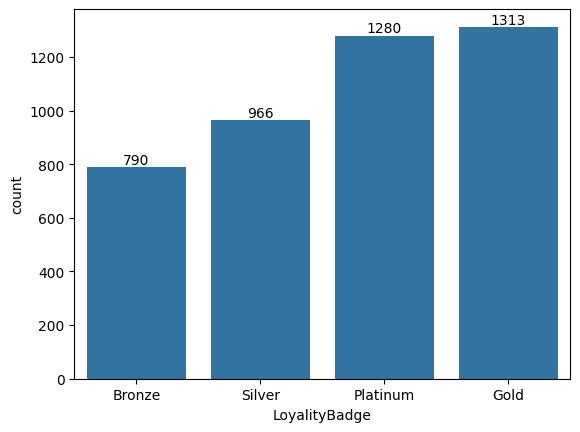

In [64]:
ax=sns.countplot(x=segmented_data['LoyalityBadge'],order=segmented_data['LoyalityBadge'].value_counts(ascending=True).index)
ax.bar_label(ax.containers[0])
plt.show()

In [1]:
segmented_data.to_csv('RFM_customer.csv')

NameError: name 'segmented_data' is not defined